In [ ]:
pip install emukit


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import GPy
import emukit.multi_fidelity
import emukit.test_functions
from emukit.model_wrappers.gpy_model_wrappers import GPyMultiOutputWrapper
from emukit.multi_fidelity.models import GPyLinearMultiFidelityModel
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
%matplotlib inline

In [ ]:
pip install GPy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
# DNS_data=pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Linewssdns_short.csv')
# RANS_data=pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Linewssfullrans_short.csv')


DNS_data=pd.read_csv('/content/drive/MyDrive/ColabNotebooks/gradpresDNS.csv')
RANS_data=pd.read_csv('/content/drive/MyDrive/ColabNotebooks/gradpresRANS.csv')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#  DNS_data=DNS_data*1000
# RANS_data=RANS_data*1000


In [ ]:
# Generate sample data

x_train_l =  np.array([[70,100],[70,80],[70,50],[70,30],[70,0],[60,100],[60,80],[60,50],[60,30],[60,0],[50,100],[50,80],[50,50],[50,30],[50,0],[40,100],[40,80],[40,50],[40,30],[40,0]])
x_train_h = np.array([[70,100],[70,0],[60,80],[50,50],[40,100],[40,0]])

DNS_full=DNS_data.dropna(axis=1)
DNS_full=DNS_full.values
DNS=DNS_full[:,[0,2,3,7,8,10]]
DNS=DNS[100:200:3,:]

DNS_test=DNS_full[:,[1,4,5,6,9]]
DNS_test=DNS_test[100:200:3,:]

RANS=RANS_data.dropna(axis=1)
RANS_full=RANS.values

RANS_test=RANS_full[:,[0,1,3,4,5,6,7,10,12,13,14,15,16,17,19]]
RANS=RANS_full[100:200:3,:]
RANS_test=RANS_test[100:200:3,:]
#D_70_100=np.array(DNS_data['70_100'])
#D_70_100=D_70_100.reshape(-1,1)
#np.stack(())
#print(column_values.shape)

DNS_full=np.transpose(DNS_full)
y_train_h=np.transpose(DNS)
y_train_l=np.transpose(RANS)


print(np.shape(y_train_h))
print(np.shape(y_train_l))

(6, 34)
(20, 34)


In [ ]:
# CI = np.ones(c[1])*1.96*hf_std_lin_mf_model[i,:].reshape(-1,1)
# CI=CI.T
# print(CI.shape)


In [ ]:
# x_train_l=np.c_[ x_train_l, np.zeros(len(x_train_l)) ]
# x_train_h=np.c_[ x_train_h, np.ones(len(x_train_h)) ]
# X_train=np.append(x_train_l,x_train_h,axis=0)
#
from emukit.multi_fidelity.convert_lists_to_array import convert_x_list_to_array, convert_xy_lists_to_arrays

# Y_train=np.append(y_train_h,y_train_l,axis=0)
X_train, Y_train = convert_xy_lists_to_arrays([x_train_l, x_train_h], [y_train_l, y_train_h])
print(X_train.shape)
print(Y_train.shape)

print(X_train)

(26, 3)
(26, 34)
[[ 70. 100.   0.]
 [ 70.  80.   0.]
 [ 70.  50.   0.]
 [ 70.  30.   0.]
 [ 70.   0.   0.]
 [ 60. 100.   0.]
 [ 60.  80.   0.]
 [ 60.  50.   0.]
 [ 60.  30.   0.]
 [ 60.   0.   0.]
 [ 50. 100.   0.]
 [ 50.  80.   0.]
 [ 50.  50.   0.]
 [ 50.  30.   0.]
 [ 50.   0.   0.]
 [ 40. 100.   0.]
 [ 40.  80.   0.]
 [ 40.  50.   0.]
 [ 40.  30.   0.]
 [ 40.   0.   0.]
 [ 70. 100.   1.]
 [ 70.   0.   1.]
 [ 60.  80.   1.]
 [ 50.  50.   1.]
 [ 40. 100.   1.]
 [ 40.   0.   1.]]


In [ ]:
## Create standard GP model using only high-fidelity data
x_train_DNS=x_train_h
y_train_DNS=y_train_h
kernelDNS = GPy.kern.ExpQuad(input_dim=2,lengthscale=[10,10],variance=0.1, ARD=True)
kernelDNS.lengthscale.constrain_bounded(0,1000)
kernelDNS.variance.constrain_bounded(0,10)
high_gp_model = GPy.models.GPRegression(x_train_DNS, y_train_DNS, kernelDNS)
high_gp_model.Gaussian_noise.fix(1)

## Fit the GP model

high_gp_model.optimize_restarts(500)


Optimization restart 1/500, f = 483.0436295078473
Optimization restart 2/500, f = 527.7712212475238
Optimization restart 3/500, f = 553.9860163308517
Optimization restart 4/500, f = 575.3370053159539
Optimization restart 5/500, f = 575.3369974403478
Optimization restart 6/500, f = 575.3370065782268
Optimization restart 7/500, f = 527.7712059047292
Optimization restart 8/500, f = 527.7712177174495
Optimization restart 9/500, f = 483.04369035810896
Optimization restart 10/500, f = 483.04834391160466
Optimization restart 11/500, f = 575.3369967778962
Optimization restart 12/500, f = 575.3370020949235
Optimization restart 13/500, f = 575.3369968719227
Optimization restart 14/500, f = 527.771207527943


 /usr/local/lib/python3.10/dist-packages/GPy/kern/src/stationary.py:243: RuntimeWarning:invalid value encountered in true_divide


Optimization restart 15/500, f = 526.8749520094102
Optimization restart 16/500, f = 575.3369971884186
Optimization restart 17/500, f = 483.0436759593259
Optimization restart 18/500, f = 483.04363799151884
Optimization restart 19/500, f = 483.0436263666046
Optimization restart 20/500, f = 575.3370042733519
Optimization restart 21/500, f = 527.7712198525336
Optimization restart 22/500, f = 483.0436350354178
Optimization restart 23/500, f = 483.04362404621577
Optimization restart 24/500, f = 483.04362452118903
Optimization restart 25/500, f = 483.0436242005361
Optimization restart 26/500, f = 483.04362633461193
Optimization restart 27/500, f = 483.04363784113684
Optimization restart 28/500, f = 483.04362429240007
Optimization restart 29/500, f = 483.04362388321624
Optimization restart 30/500, f = 483.0436281869824
Optimization restart 31/500, f = 483.04362878691256
Optimization restart 32/500, f = 527.7705539309305
Optimization restart 33/500, f = 483.0436337547451
Optimization restart 34

In [ ]:
print(high_gp_model.ExpQuad.lengthscale[0])
print(high_gp_model.ExpQuad.lengthscale[1])
print(high_gp_model.ExpQuad.variance)
print(high_gp_model.gradient)
# Get the gradients of optimization
gradients_dns = high_gp_model.gradient

# Get the names of the model's parameters
parameter_dns = high_gp_model.parameter_names()

# Print the gradients along with the parameter names
print("Gradients of Optimization:")
for i in range(len(parameter_dns)):
    print(f"Parameter: {parameter_dns[i]} - Gradient: {gradients_dns[i]}")


16.142366662044193
196.2230247990388
  index  |  GP_regression.ExpQuad.variance  |  constraints  |  priors
  [0]    |                     10.00000000  |   0.0,10.0    |        
[ 2.36174400e+00 -9.42209734e-09 -1.73312947e-10  7.55866943e+00]
Gradients of Optimization:
Parameter: ExpQuad.variance - Gradient: 2.3617439964220224
Parameter: ExpQuad.lengthscale - Gradient: -9.4220973425523e-09
Parameter: Gaussian_noise.variance - Gradient: -1.7331294656440195e-10


In [ ]:
## Create standard GP model using only low-fidelity data

x_train_RANS= np.array([[70,100],[70,80],[70,30],[70,0],[60,100],[60,80],[60,50],[50,100],[50,50],[50,30],[50,0],[40,100],[40,80],[40,50],[40,0]])

y_train_RANS=np.transpose(RANS_test)
print(y_train_RANS.shape)

(15, 34)


In [ ]:
# Perform sensitivity analysis using Sobol indices
sensitivity = high_gp_model.input_sensitivity()

# Calculate the sum of sensitivity indices
sensitivity_sum = sum(sensitivity)

# Normalize the sensitivity indices
normalized_sensitivity = [index / sensitivity_sum for index in sensitivity]

# Calculate the total Sobol indices
total_sobol_indices = [index ** 2 for index in normalized_sensitivity]

# Normalize the total Sobol indices
total_sobol_sum = sum(total_sobol_indices)
normalized_total_sobol_indices = [index / total_sobol_sum for index in total_sobol_indices]

# Print the normalized total Sobol indices
print("Normalized Total Sobol Indices:")
for i, sobol_index in enumerate(normalized_total_sobol_indices):
    print(f"Variable {i+1}: {sobol_index}")


Normalized Total Sobol Indices:
Variable 1: 0.999954201729678
Variable 2: 4.579827032199186e-05


In [ ]:
# Perform sensitivity analysis using Sobol indices
sensitivity = high_gp_model.input_sensitivity()

# Normalize the sensitivity indices
sensitivity_sum = sum(sensitivity)
normalized_sensitivity = [index / sensitivity_sum for index in sensitivity]

# Print the normalized sensitivity indices
print("Normalized Sensitivity Indices:")
for i, sensitivity_index in enumerate(normalized_sensitivity):
    print(f"Variable {i+1}: {sensitivity_index}")

Normalized Sensitivity Indices:
Variable 1: 0.99327789558575
Variable 2: 0.006722104414250089


In [ ]:
kernelRANS = GPy.kern.ExpQuad(input_dim=2,lengthscale=[10,10],variance=0.2, ARD=True)
kernelRANS.lengthscale.constrain_bounded(0,10000)
kernelRANS.variance.constrain_bounded(0,10)
low_gp_model = GPy.models.GPRegression(x_train_RANS, y_train_RANS, kernelRANS)
low_gp_model.Gaussian_noise.fix(1.5)

## Fit the GP model


low_gp_model.optimize_restarts(500)

Optimization restart 1/500, f = 910.9378393308518
Optimization restart 2/500, f = 983.3838011506668
Optimization restart 3/500, f = 983.3836495039889
Optimization restart 4/500, f = 983.3750632203819
Optimization restart 5/500, f = 997.0675008503334
Optimization restart 6/500, f = 910.9378361769104
Optimization restart 7/500, f = 983.3446728825631
Optimization restart 8/500, f = 983.383618182957
Optimization restart 9/500, f = 910.9378377466437
Optimization restart 10/500, f = 915.2017354984783
Optimization restart 11/500, f = 1385.8162302127143
Optimization restart 12/500, f = 962.2042378259657
Optimization restart 13/500, f = 997.0162579078674
Optimization restart 14/500, f = 983.3832581814361
Optimization restart 15/500, f = 910.9378404363285
Optimization restart 16/500, f = 910.9378361774006
Optimization restart 17/500, f = 1385.816223984825
Optimization restart 18/500, f = 1385.8162239856165
Optimization restart 19/500, f = 910.9378398529457
Optimization restart 20/500, f = 923.26

In [ ]:
print(low_gp_model.ExpQuad.lengthscale[0])
print(low_gp_model.ExpQuad.lengthscale[1])
print(low_gp_model.ExpQuad.variance)

# Get the gradients of optimization
gradients_rans = low_gp_model.gradient

# Get the names of the model's parameters
parameter_rans = low_gp_model.parameter_names()

# Print the gradients along with the parameter names
print("Gradients of Optimization:")
for i in range(len(parameter_rans)):
    print(f"Parameter: {parameter_rans[i]} - Gradient: {gradients_rans[i]}")


19.316997928404234
243.08208833899934
  index  |  GP_regression.ExpQuad.variance  |  constraints  |  priors
  [0]    |                     10.00000000  |   0.0,10.0    |        
Gradients of Optimization:
Parameter: ExpQuad.variance - Gradient: 2.4262194577734206
Parameter: ExpQuad.lengthscale - Gradient: 6.1568252864960894e-09
Parameter: Gaussian_noise.variance - Gradient: -3.3897910252747526e-09


In [ ]:
# Perform sensitivity analysis using Sobol indices
sensitivity = low_gp_model.input_sensitivity()

# Normalize the sensitivity indices
sensitivity_sum = sum(sensitivity)
normalized_sensitivity = [index / sensitivity_sum for index in sensitivity]

# Print the normalized sensitivity indices
print("Normalized Sensitivity Indices:")
for i, sensitivity_index in enumerate(normalized_sensitivity):
    print(f"Variable {i+1}: {sensitivity_index}")

Normalized Sensitivity Indices:
Variable 1: 0.9937246290530963
Variable 2: 0.0062753709469037175


In [ ]:
# Perform sensitivity analysis using Sobol indices
sensitivity = low_gp_model.input_sensitivity()

# Calculate the sum of sensitivity indices
sensitivity_sum = sum(sensitivity)

# Normalize the sensitivity indices
normalized_sensitivity = [index / sensitivity_sum for index in sensitivity]

# Calculate the total Sobol indices
total_sobol_indices = [index ** 2 for index in normalized_sensitivity]

# Normalize the total Sobol indices
total_sobol_sum = sum(total_sobol_indices)
normalized_total_sobol_indices = [index / total_sobol_sum for index in total_sobol_indices]

# Print the normalized total Sobol indices
print("Normalized Total Sobol Indices:")
for i, sobol_index in enumerate(normalized_total_sobol_indices):
    print(f"Variable {i+1}: {sobol_index}")


Normalized Total Sobol Indices:
Variable 1: 0.9999601223663767
Variable 2: 3.9877633623389005e-05


In [ ]:
# Print the interaction terms
print("Interaction Terms:")
for i in range(len(sensitivity)):
    for j in range(i+1, len(sensitivity)):
        interaction = sensitivity[i] * sensitivity[j]
        print(f"Variable {i+1} x Variable {j+1}: {interaction}")


Interaction Terms:
Variable 1 x Variable 2: 4.535391857445648e-06


In [ ]:
kernels = [GPy.kern.ExpQuad(input_dim=2,lengthscale=[10,10],variance=0.005, ARD=True),GPy.kern.ExpQuad(input_dim=2,lengthscale=[10,10],variance=0.005, ARD=True)]
# for kernel in kernels:
#     kernel.lengthscale.constrain_bounded(0, 50)
#     kernel.variance.constrain_bounded(0, 10)
for i, kernel in enumerate(kernels):
    if i == 0:  # First fidelity
        kernel.lengthscale.constrain_bounded(0,1000)
        kernel.variance.constrain_bounded(0, 5)
    elif i == 1:  # Second fidelity
        kernel.lengthscale.constrain_bounded(0, 1000)
        kernel.variance.constrain_bounded(0, 10)
lin_mf_kernel = emukit.multi_fidelity.kernels.LinearMultiFidelityKernel(kernels)

gpy_lin_mf_model = GPyLinearMultiFidelityModel(X_train, Y_train, lin_mf_kernel, n_fidelities=2)

gpy_lin_mf_model.mixed_noise.Gaussian_noise.fix(0.01)
gpy_lin_mf_model.mixed_noise.Gaussian_noise_1.fix(0.0001)

lin_mf_model =model=GPyMultiOutputWrapper(gpy_lin_mf_model, 2, n_optimization_restarts=100)

## Fit the model

lin_mf_model.optimize()

Optimization restart 1/100, f = 1247.6281677758725
Optimization restart 2/100, f = 1236.2937863667366
Optimization restart 3/100, f = 1236.2571365589058
Optimization restart 4/100, f = 1236.2573515912054
Optimization restart 5/100, f = 1379.4561965038952
Optimization restart 6/100, f = 1254.483369692528
Optimization restart 7/100, f = 2064.8268131081613
Optimization restart 8/100, f = 1236.2567918269765
Optimization restart 9/100, f = 1254.4688136932455
Optimization restart 10/100, f = 1352.3653844634623
Optimization restart 11/100, f = 1309.248768458066
Optimization restart 12/100, f = 1236.2567885717283
Optimization restart 13/100, f = 1379.4560630635838
Optimization restart 14/100, f = 1236.2568069459962
Optimization restart 15/100, f = 1236.2568036224684
Optimization restart 16/100, f = 1362.0228251255642
Optimization restart 17/100, f = 1352.3875223385082
Optimization restart 18/100, f = 2064.8221530626042
Optimization restart 19/100, f = 1236.2567889782595
Optimization restart 20

In [ ]:
 print(gpy_lin_mf_model)


Name : gp
Objective : 1236.2567886230768
Number of Parameters : 9
Number of Optimization Parameters : 7
Updates : True
Parameters:
  gp.                                    |                value  |  constraints  |  priors
  multifidelity.ExpQuad.variance         |                  5.0  |    0.0,5.0    |        
  multifidelity.ExpQuad.lengthscale      |                 (2,)  |  0.0,1000.0   |        
  multifidelity.ExpQuad_1.variance       |  0.08872147911997748  |   0.0,10.0    |        
  multifidelity.ExpQuad_1.lengthscale    |                 (2,)  |  0.0,1000.0   |        
  multifidelity.scale                    |   0.9638308680868194  |               |        
  mixed_noise.Gaussian_noise.variance    |                 0.01  |   +ve fixed   |        
  mixed_noise.Gaussian_noise_1.variance  |               0.0001  |   +ve fixed   |        


In [ ]:
  print(gpy_lin_mf_model.multifidelity.ExpQuad.variance)
  print(gpy_lin_mf_model.multifidelity.ExpQuad_1.variance)
  print(gpy_lin_mf_model.multifidelity.ExpQuad.lengthscale)
  print(gpy_lin_mf_model.multifidelity.ExpQuad_1.lengthscale)

  index  |  gp.multifidelity.ExpQuad.variance  |  constraints  |  priors
  [0]    |                         5.00000000  |    0.0,5.0    |        
  index  |  gp.multifidelity.ExpQuad_1.variance  |  constraints  |  priors
  [0]    |                           0.08872148  |   0.0,10.0    |        
  index  |  gp.multifidelity.ExpQuad.lengthscale  |  constraints  |  priors
  [0]    |                            9.16570991  |  0.0,1000.0   |        
  [1]    |                           34.39643404  |  0.0,1000.0   |        
  index  |  gp.multifidelity.ExpQuad_1.lengthscale  |  constraints  |  priors
  [0]    |                              8.96183056  |  0.0,1000.0   |        
  [1]    |                             77.08908031  |  0.0,1000.0   |        


In [ ]:
# Get the gradients of optimization
gradients_mf = gpy_lin_mf_model.multifidelity.gradient

# Get the names of the model's parameters
parameter_mf = gpy_lin_mf_model.multifidelity.parameter_names()

# Print the gradients along with the parameter names
print("Gradients of Optimization:")
for i in range(len(parameter_mf)):
    print(f"Parameter: {parameter_mf[i]} - Gradient: {gradients_mf[i]}")

Gradients of Optimization:
Parameter: ExpQuad.variance - Gradient: 26.604546086162735
Parameter: ExpQuad.lengthscale - Gradient: 0.0004241379459195541
Parameter: ExpQuad_1.variance - Gradient: -0.00019427254176929178
Parameter: ExpQuad_1.lengthscale - Gradient: -0.017796634745800222
Parameter: scale - Gradient: 1.0242466213663843e-05


In [ ]:

#x_plot=np.reshape(x,[10000,2])
x_plot=np.array([[70,50],[60,30],[60,0],[50,80],[40,30]])
X_plot_l=np.c_[ x_plot, np.zeros(len(x_plot)) ]
X_plot_h=np.c_[ x_plot, np.ones(len(x_plot)) ]

In [ ]:
hf_mean_lin_mf_model, hf_var_lin_mf_model = lin_mf_model.predict(X_plot_h)

hf_std_lin_mf_model = np.sqrt(hf_var_lin_mf_model)
hf_mean_high_gp_model, hf_var_high_gp_model  = high_gp_model.predict(X_plot_h)
lf_mean_low_gp_model, lf_var_low_gp_model  = low_gp_model.predict(X_plot_h)

In [ ]:
# print(np.amax(hf_mean_lin_mf_model))
print(np.sqrt(hf_var_lin_mf_model)*1.96)
print(np.sqrt(hf_var_high_gp_model)*1.96)
print(np.sqrt(lf_var_low_gp_model)*1.96)
# c=(hf_mean_lin_mf_model.shape)
# print(c)



[[0.28777483]
 [0.36476254]
 [0.44694475]
 [0.28971272]
 [0.27124399]]
[[2.38361496]
 [2.54148041]
 [2.79214186]
 [2.46105796]
 [2.40717731]]
[[2.65220013]
 [2.64446235]
 [2.77564323]
 [2.60687671]
 [2.67999092]]


In [ ]:
print(hf_var_lin_mf_model)
print(hf_var_high_gp_model)
print(lf_var_low_gp_model)

[[0.02155747]
 [0.03463491]
 [0.0519999 ]
 [0.02184877]
 [0.01915188]]
[[1.47897238]
 [1.68136262]
 [2.02937739]
 [1.57663638]
 [1.50835657]]
[[1.83105101]
 [1.82038243]
 [2.00546526]
 [1.76900411]
 [1.86962499]]


In [ ]:
print(hf_mean_lin_mf_model)
print(hf_mean_high_gp_model)
print(lf_mean_low_gp_model)

[[-2.38592200e-01 -3.45340151e-01 -5.06617019e-01 -7.19133415e-01
  -9.82189041e-01 -1.31530832e+00 -1.83517172e+00 -2.44501911e+00
  -3.27132524e+00 -4.33487945e+00 -5.76448989e+00 -7.47223173e+00
  -9.27329963e+00 -1.10174598e+01 -1.24685993e+01 -1.32191050e+01
  -1.23358759e+01 -9.51709933e+00 -5.97959525e+00 -2.69632409e+00
  -1.34202904e+00  9.44066883e-02  5.83212025e-01  5.15106752e-01
   4.51114899e-01  2.89529860e-01  2.79770329e-01  2.08839863e-01
   1.94308293e-01  1.58601586e-01  9.98996036e-02  6.24981813e-02
   2.73107477e-03 -2.55975489e-03]
 [-1.84084094e-01 -2.69387432e-01 -3.92690161e-01 -5.55870639e-01
  -7.55988196e-01 -1.00061480e+00 -1.35573730e+00 -1.76185418e+00
  -2.28545028e+00 -2.90297137e+00 -3.67728042e+00 -4.45141034e+00
  -5.19376544e+00 -5.74055162e+00 -6.13123113e+00 -6.05606488e+00
  -5.53161926e+00 -4.67654308e+00 -3.55170469e+00 -1.99535049e+00
  -8.26588349e-01 -1.42870836e-01  2.55429414e-01  4.36998787e-01
   4.56698834e-01  4.43607631e-01  3.9325

In [ ]:
print(ytrain.shape)

NameError: ignored

(34, 1)
(34, 1)


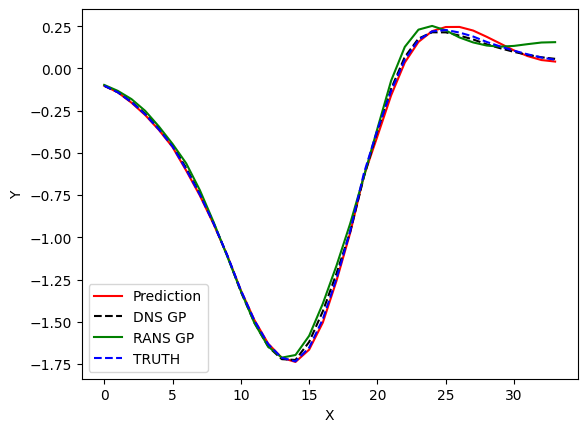

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
fig,ax=plt.subplots()
#DNS_test.shape[0]
i=4


x_pred = np.linspace(0,33,34).reshape(-1, 1)
# Calculate upper and lower confidence bounds
confidence = 1.96 # 95% confidence interval (approximate)
lower_bound = hf_mean_lin_mf_model[i]- confidence * np.sqrt(hf_var_lin_mf_model[i])
upper_bound = hf_mean_lin_mf_model[i]+ confidence * np.sqrt(hf_var_lin_mf_model[i])
ax.plot(hf_mean_lin_mf_model[i],color='r',label='Prediction')
# ax.fill_between(x_pred.flatten(), lower_bound.flatten(), upper_bound.flatten(), color='red', alpha=0.5, label='C.I-MF')



#for i in range(1):
#ax.fill_between((hf_mean_lin_mf_model[0] - 1.96*hf_std_lin_mf_model[0]).flatten(),
#(hf_mean_lin_mf_model[0] + 1.96*hf_std_lin_mf_model[0]).flatten(), color='r', alpha=0.3)
# ax.plot(RANS_test[:,i],color='k',linestyle='dotted',label='RANS')
ax.plot(hf_mean_high_gp_model[i],color='black',linestyle='--',label='DNS GP')
lower_bound_dns = hf_mean_high_gp_model[i]- confidence * np.sqrt(hf_var_high_gp_model[i])
upper_bound_dns = hf_mean_high_gp_model[i]+ confidence * np.sqrt(hf_var_high_gp_model[i])
# ax.fill_between(x_pred.flatten(), lower_bound_dns.flatten(), upper_bound_dns.flatten(), color='gray', alpha=0.3, label='C.I-DNS')
ax.plot(lf_mean_low_gp_model[i],color='green',label='RANS GP')
lower_bound_rans = lf_mean_low_gp_model[i]- confidence * np.sqrt(lf_var_low_gp_model[i])
upper_bound_rans = lf_mean_low_gp_model[i]+ confidence * np.sqrt(lf_var_low_gp_model[i])
# ax.fill_between(x_pred.flatten(), lower_bound_rans.flatten(), upper_bound_rans.flatten(), color='green', alpha=0.3, label='C.I-RANS')
ax.plot(DNS_test[:,i],color='b',linestyle='--',label='TRUTH')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()


x_data=x_pred
y_truth=DNS_test[:,i].reshape(-1,1)

print(y_truth.shape)
print(x_data.shape)
write_truth = np.stack((x_data,y_truth), axis = 1).reshape(-1,2)


e= "streamwise WSS"
hdrtxt='# xpoints','#ypoints'
np.savetxt('/content/drive/MyDrive/ColabNotebooks/Truth_40_e30GPress.dat', write_truth, delimiter='  ', header='Position\tMean', comments='' )

In [ ]:
print(np.sqrt(hf_var_high_gp_model[i]))
# print(x_pred)
print(lf_var_low_gp_model)
print(hf_var_high_gp_model)
print(hf_var_lin_mf_model)

In [ ]:

i=0
x_data=x_pred
y_data=hf_mean_lin_mf_model[i].reshape(-1,1)

y_hf=hf_mean_high_gp_model[i].reshape(-1,1)

y_lf=lf_mean_low_gp_model[i].reshape(-1,1)

print(y_data.shape)
print(x_data.shape)
write_mf = np.stack((x_data,y_data), axis = 1).reshape(-1,2)
write_lf = np.stack((x_data,y_lf), axis = 1).reshape(-1,2)
write_hf = np.stack((x_data,y_hf), axis = 1).reshape(-1,2)
print(write_hf.shape)

e= "streamwise WSS"
hdrtxt='# xpoints','#ypoints'
np.savetxt('/content/drive/MyDrive/ColabNotebooks/MF_70_e50GPress.dat', write_mf,delimiter='  ', header='Position\tMean', comments='' )
np.savetxt('/content/drive/MyDrive/ColabNotebooks/LF_70_e50GPress.dat', write_lf, delimiter='  ', header='Position\tMean', comments='' )
np.savetxt('/content/drive/MyDrive/ColabNotebooks/HF_70_e50GPress.dat', write_hf,delimiter='  ', header='Position\tMean', comments='' )

(34, 1)
(34, 1)
(34, 2)


In [ ]:
# # Define the range of x values for prediction
# x_pred = np.linspace(0,50, 50).reshape(-1, 1)

# # Predict mean and variance at the given x values
# mean, var = model.predict(x_pred)

# # Calculate upper and lower confidence bounds
# confidence = 1.96  # 95% confidence interval (approximate)
# lower_bound = mean - confidence * np.sqrt(var)
# upper_bound = mean + confidence * np.sqrt(var)

# # Plot the data points, mean, and confidence interval
# plt.scatter(X_train, Y_train, color='red', label='Training data')
# plt.plot(x_pred, mean, color='blue', label='Mean')
# plt.fill_between(x_pred.flatten(), lower_bound.flatten(), upper_bound.flatten(), color='gray', alpha=0.3, label='Confidence interval')
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title('GPy Model Predictions with Confidence Interval')
# plt.legend()
# plt.show()

In [ ]:
fig,ax=plt.subplots()
for i in range(hf_mean_lin_mf_model.shape[0]):
   ax.plot(hf_mean_lin_mf_model[i])
ax.set_xlabel('X')
ax.set_ylabel('Y')


In [ ]:
# CI = np.ones(c[1])*1.96*hf_std_lin_mf_model[i,:].reshape(-1,1)
# CI=CI.T
# print(CI.shape)
i=4
x_data=x_pred
y_data=hf_mean_lin_mf_model[i].reshape(-1,1)

y_hf=hf_mean_high_gp_model[i].reshape(-1,1)

y_lf=lf_mean_low_gp_model[i].reshape(-1,1)

print(y_data.shape)
print(x_data.shape)
write_mf = np.stack((x_data,y_data), axis = 1).reshape(-1,2)
write_lf = np.stack((x_data,y_lf), axis = 1).reshape(-1,2)
write_hf = np.stack((x_data,y_hf), axis = 1).reshape(-1,2)
print(write_hf.shape)

e= "streamwise WSS"
hdrtxt='# xpoints','#ypoints'
np.savetxt('/content/drive/MyDrive/ColabNotebooks/MF_40_e30GPress.dat', write_mf, delimiter='  ', header='Position\tMean', comments='' )
np.savetxt('/content/drive/MyDrive/ColabNotebooks/LF_40_e30GPress.dat', write_lf, delimiter='  ', header='Position\tMean', comments='' )
np.savetxt('/content/drive/MyDrive/ColabNotebooks/HF_40_e30GPress.dat', write_hf, delimiter='  ', header='Position\tMean', comments='' )


In [ ]:
print(lf_var_low_gp_model)
print(hf_var_high_gp_model)
print(hf_var_lin_mf_model)